In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Simple Linear Regression

$
y = ax + b
$

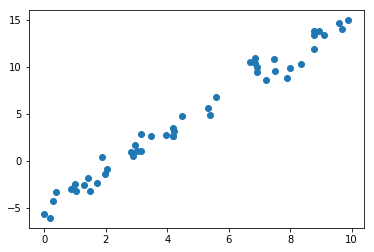

In [71]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = (2 * x) - 5 + rng.randn(50)
plt.scatter(x, y)

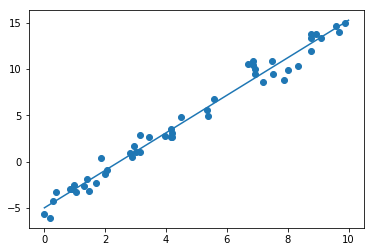

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [10]:
print(model.coef_)
print(model.intercept_)
print(model.score(x[:, np.newaxis], y))

[2.02720881]
-4.998577085553204
0.9790800609430612


# Basis Function Regression

$ 
y = \sum_{i = 0} ^ {n}{a_i}{x ^ i} 
$

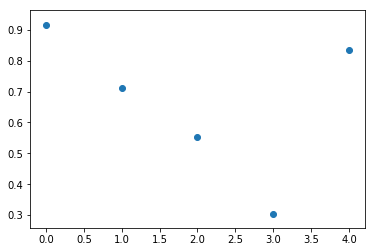

In [97]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([x for x in range(5)])
y = rng.rand(5)
plt.scatter(x, y)

In [98]:
poly = PolynomialFeatures(5, include_bias=False)
x2 = poly.fit_transform(x[:, None])
print(x2)

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]]


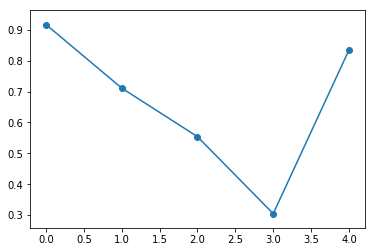

In [99]:
model = LinearRegression()
model.fit(x2, y)
yfit = model.predict(x2)
plt.scatter(x, y)
plt.plot(x, yfit)

$
y = sin(x)
$

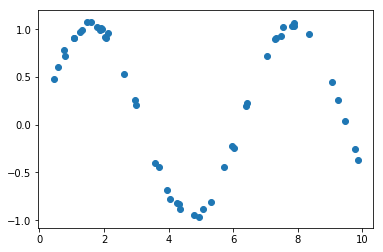

In [101]:
x = 10 * rng.rand(50)
y = np.sin(x) + (0.1 * rng.rand(50))
plt.scatter(x, y)

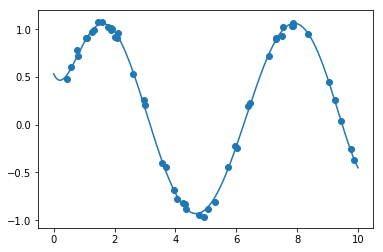

In [102]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Gaussian Basis Functions

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

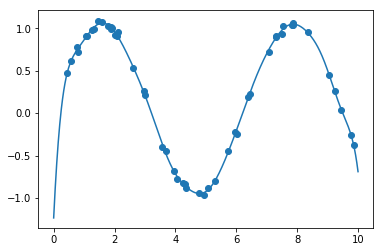

In [109]:
guess_model = make_pipeline(GaussianFeatures(20), LinearRegression())
guess_model.fit(x[:, np.newaxis], y)
yfit = guess_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Regularization

(-1.5, 1.5)

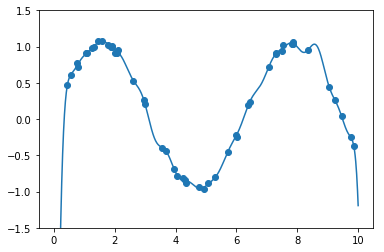

In [124]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.ylim(-1.5, 1.5)

In [129]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))    

### Overfit

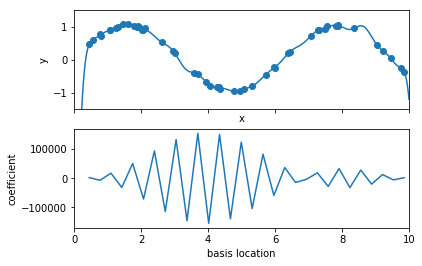

In [130]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

### Ridge Regression (L2 regularization)

$
P = \alpha \sum_{n = 1}^{N} \theta_n ^ 2
$

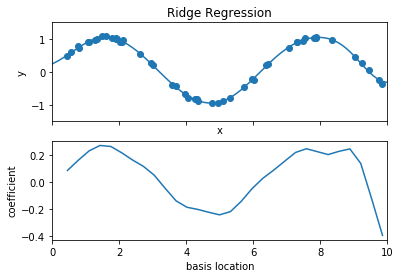

In [131]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso Regression (L1)

$
P = \alpha \sum_{n = 1}^{N} \mid \theta_n \mid
$

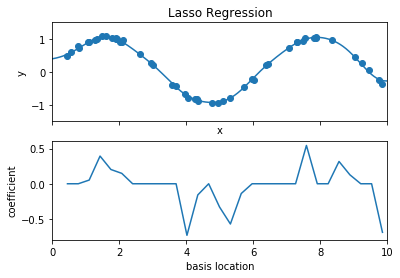

In [132]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')